# utils: map visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython import display

from beetroots.inversion.plots.map_shaper import MapShaper
from beetroots.inversion.plots.plots_2d_setup import Plots2DSetup
from beetroots.inversion.plots.plots_estimator import PlotsEstimator

In [2]:
small_size = 16
medium_size = 20
bigger_size = 24

plt.rc("font", size=small_size)  # controls default text sizes
plt.rc("axes", titlesize=small_size)  # fontsize of the axes title
plt.rc("axes", labelsize=medium_size)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=small_size)  # fontsize of the tick labels
plt.rc("ytick", labelsize=small_size)  # fontsize of the tick labels
plt.rc("legend", fontsize=small_size)  # legend fontsize
plt.rc("figure", titlesize=bigger_size)  # fontsize of the figure title

## Structure of input files

In [3]:
path_data_err = "../data/carina/carina_fts_lines_err_v4_full.pkl"
path_data_int = "../data/carina/carina_fts_lines_int_v4_full.pkl"

df_int = pd.read_pickle(path_data_int)
df_err = pd.read_pickle(path_data_err)

df_int["idx"] = np.arange(len(df_int))
df_err["idx"] = np.arange(len(df_int))

In [4]:
df_int.head()

co_v0_j4__v0_j3  co_v0_j5__v0_j4  co_v0_j6__v0_j5  co_v0_j7__v0_j6  \
X Y                                                                        
2 9          0.000004         0.000007         0.000011         0.000012   
  10         0.000004         0.000008         0.000011         0.000012   
3 7          0.000003         0.000005         0.000008         0.000009   
  8          0.000006         0.000007         0.000011         0.000013   
  9          0.000006         0.000009         0.000013         0.000014   

      co_v0_j8__v0_j7  co_v0_j9__v0_j8  co_v0_j10__v0_j9  co_v0_j11__v0_j10  \
X Y                                                                           
2 9          0.000014         0.000011          0.000010           0.000007   
  10         0.000013         0.000012          0.000010           0.000007   
3 7          0.000011         0.000012          0.000011           0.000008   
  8          0.000015         0.000014          0.000012           0.000008   
  9          0.000016         0.000014          0.000012           0.000008   

      co_v0_j12__v0_j11  co_v0_j13__v0_j12  ...  13c_o_j7__j6  13c_o_j8__j7  \
X Y                                         ...                               
2 9            0.000004           0.000002  ...      0.000002      0.000001   
  10           0.000003           0.000002  ...      0.000002      0.000001   
3 7            0.000005           0.000003  ...      0.000001      0.000001   
  8            0.000005           0.000003  ...      0.000002      0.000001   
  9            0.000004           0.000003  ...      0.000002      0.000001   

      13c_o_j9__j8  13c_o_j10__j9  13c_o_j11__j10  13c_o_j12__j11  \
X Y                                                                 
2 9       0.000001       0.000001    1.063700e-06    7.964500e-07   
  10      0.000001       0.000001    9.616100e-07    8.127100e-07   
3 7       0.000001       0.000001    4.224100e-07    4.775000e-07   
  8       0.000001       0.000001    5.350700e-07    5.279300e-07   
  9       0.000001       0.000001    6.908500e-07    6.093400e-07   

      13c_o_j13__j12  c_el3p_j1__el3p_j0  c_el3p_j2__el3p_j1  idx  
X Y                                                                
2 9     6.769200e-07            0.000001            0.000003    0  
  10    6.397400e-07            0.000002            0.000004    1  
3 7     4.198300e-07            0.000001            0.000003    2  
  8     4.875700e-07            0.000001            0.000003    3  
  9     6.810400e-07            0.000002            0.000004    4  

[5 rows x 22 columns]

The index of the two files containing the integrated intensities and the error standard deviations is `(X, Y)`, i.e., horizontal and vertical position.

This index permits to describe for non-recangular images. Such images are typically difficult to handle with matplotlib as they require to use a wide rectangular array with NaNs.

We built three classes to better handle such non-rectangular maps:
* `MapShaper` permits to convert a vector that contains only relevant values to a plotable image.
* `Plots2DSetup` contains multiple methods to plot figures relative to the setup of an inversion.
* `PlotsEstimator` permits to plot estimated physical conditions.

## MapShaper : how to convert a vector to a map

In [5]:
y = df_int.loc[:, "co_v0_j4__v0_j3"].values
y.shape

(176,)

In [6]:
map_shaper = MapShaper(df_int)
y_shaped = map_shaper.from_vector_to_map(y)

y_shaped

array([[       nan,        nan,        nan,        nan, 9.3880e-07,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan,        nan, 2.8629e-06,        nan, 1.6018e-06,
        1.6818e-06, 7.1836e-07,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan, 2.9443e-06, 2.8852e-06, 3.0009e-06, 2.5902e-06,
        1.5138e-06, 8.2986e-07, 1.0882e-06,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan, 6.0927e-06, 5.6067e-06, 3.872

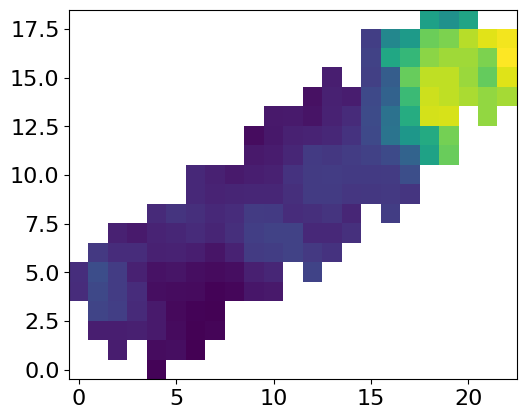

In [7]:
plt.imshow(y_shaped, origin="lower")
plt.show()

## Plot2DSetup : Already implemented methods to plot observations

In [8]:
path_img = "img/create_input_files"
N = len(df_int)

setup_plotter = Plots2DSetup(path_img, map_shaper, N)

In [9]:
# choose the lines to plot
list_lines = ["co_v0_j4__v0_j3", "co_v0_j5__v0_j4"]

setup_plotter.plot_observations(
    y=df_int.loc[:, list_lines].values, list_lines=list_lines, folder_path=path_img
)

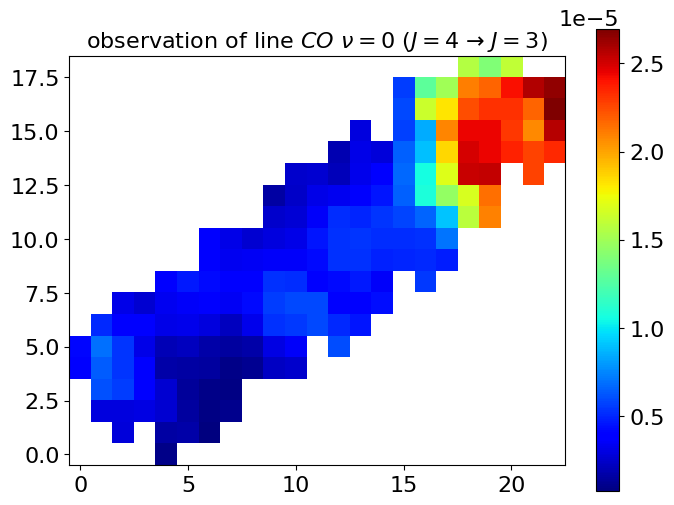

In [10]:
display.Image(f"{path_img}/observation_line_0_co_v0_j4__v0_j3_linscale.PNG")

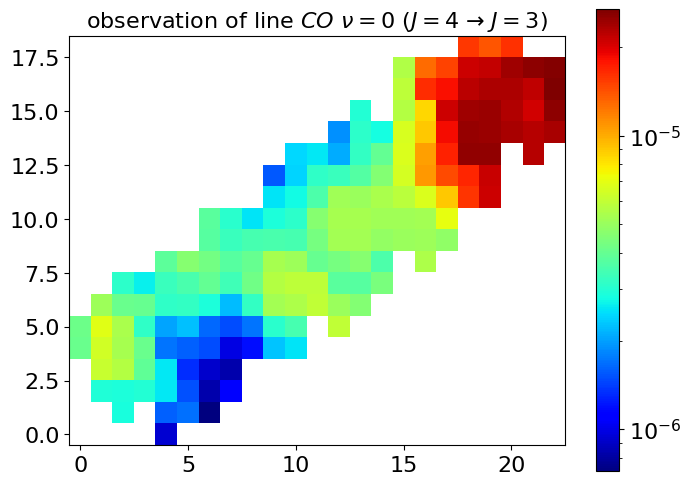

In [11]:
display.Image(f"{path_img}/observation_line_0_co_v0_j4__v0_j3.PNG")

It is also possible to highlight some pixels. To do so, simply provide a dictionary of (index, name) pairs:

In [12]:
setup_plotter = Plots2DSetup(
    path_img, map_shaper, N, pixels_of_interest={158: "Car-I", 76: "Car-I/II"}
)

setup_plotter.plot_observations(
    y=df_int.loc[:, list_lines].values, list_lines=list_lines, folder_path=path_img
)

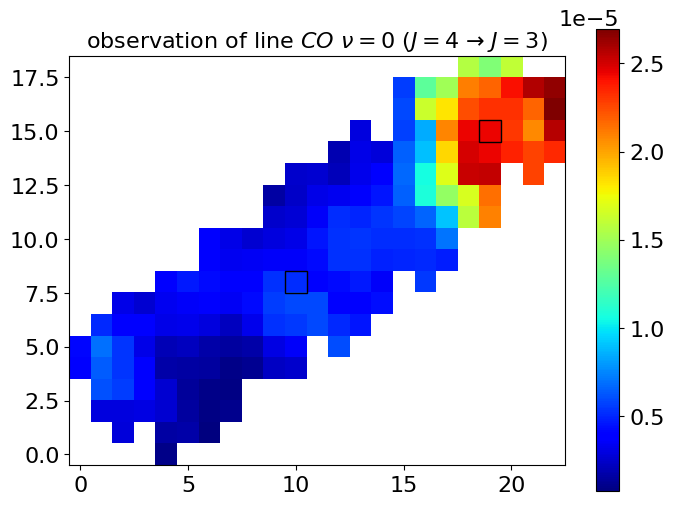

In [13]:
display.Image(f"{path_img}/observation_line_0_co_v0_j4__v0_j3_linscale.PNG")

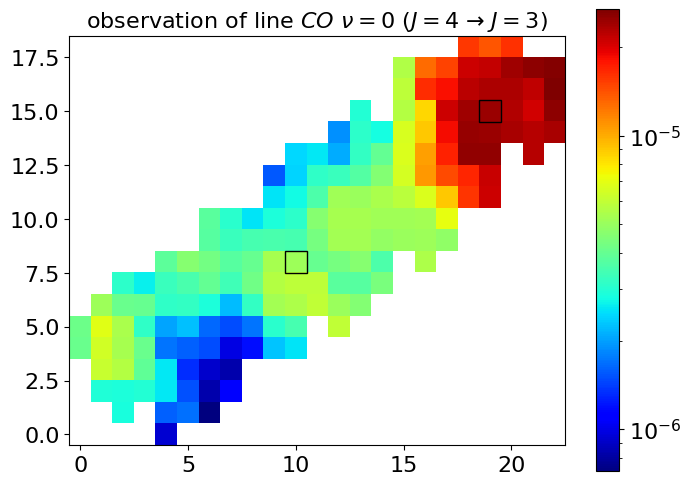

In [14]:
display.Image(f"{path_img}/observation_line_0_co_v0_j4__v0_j3.PNG")

To check the indices to highlight the pixel you are interested in, plot the map of indices :

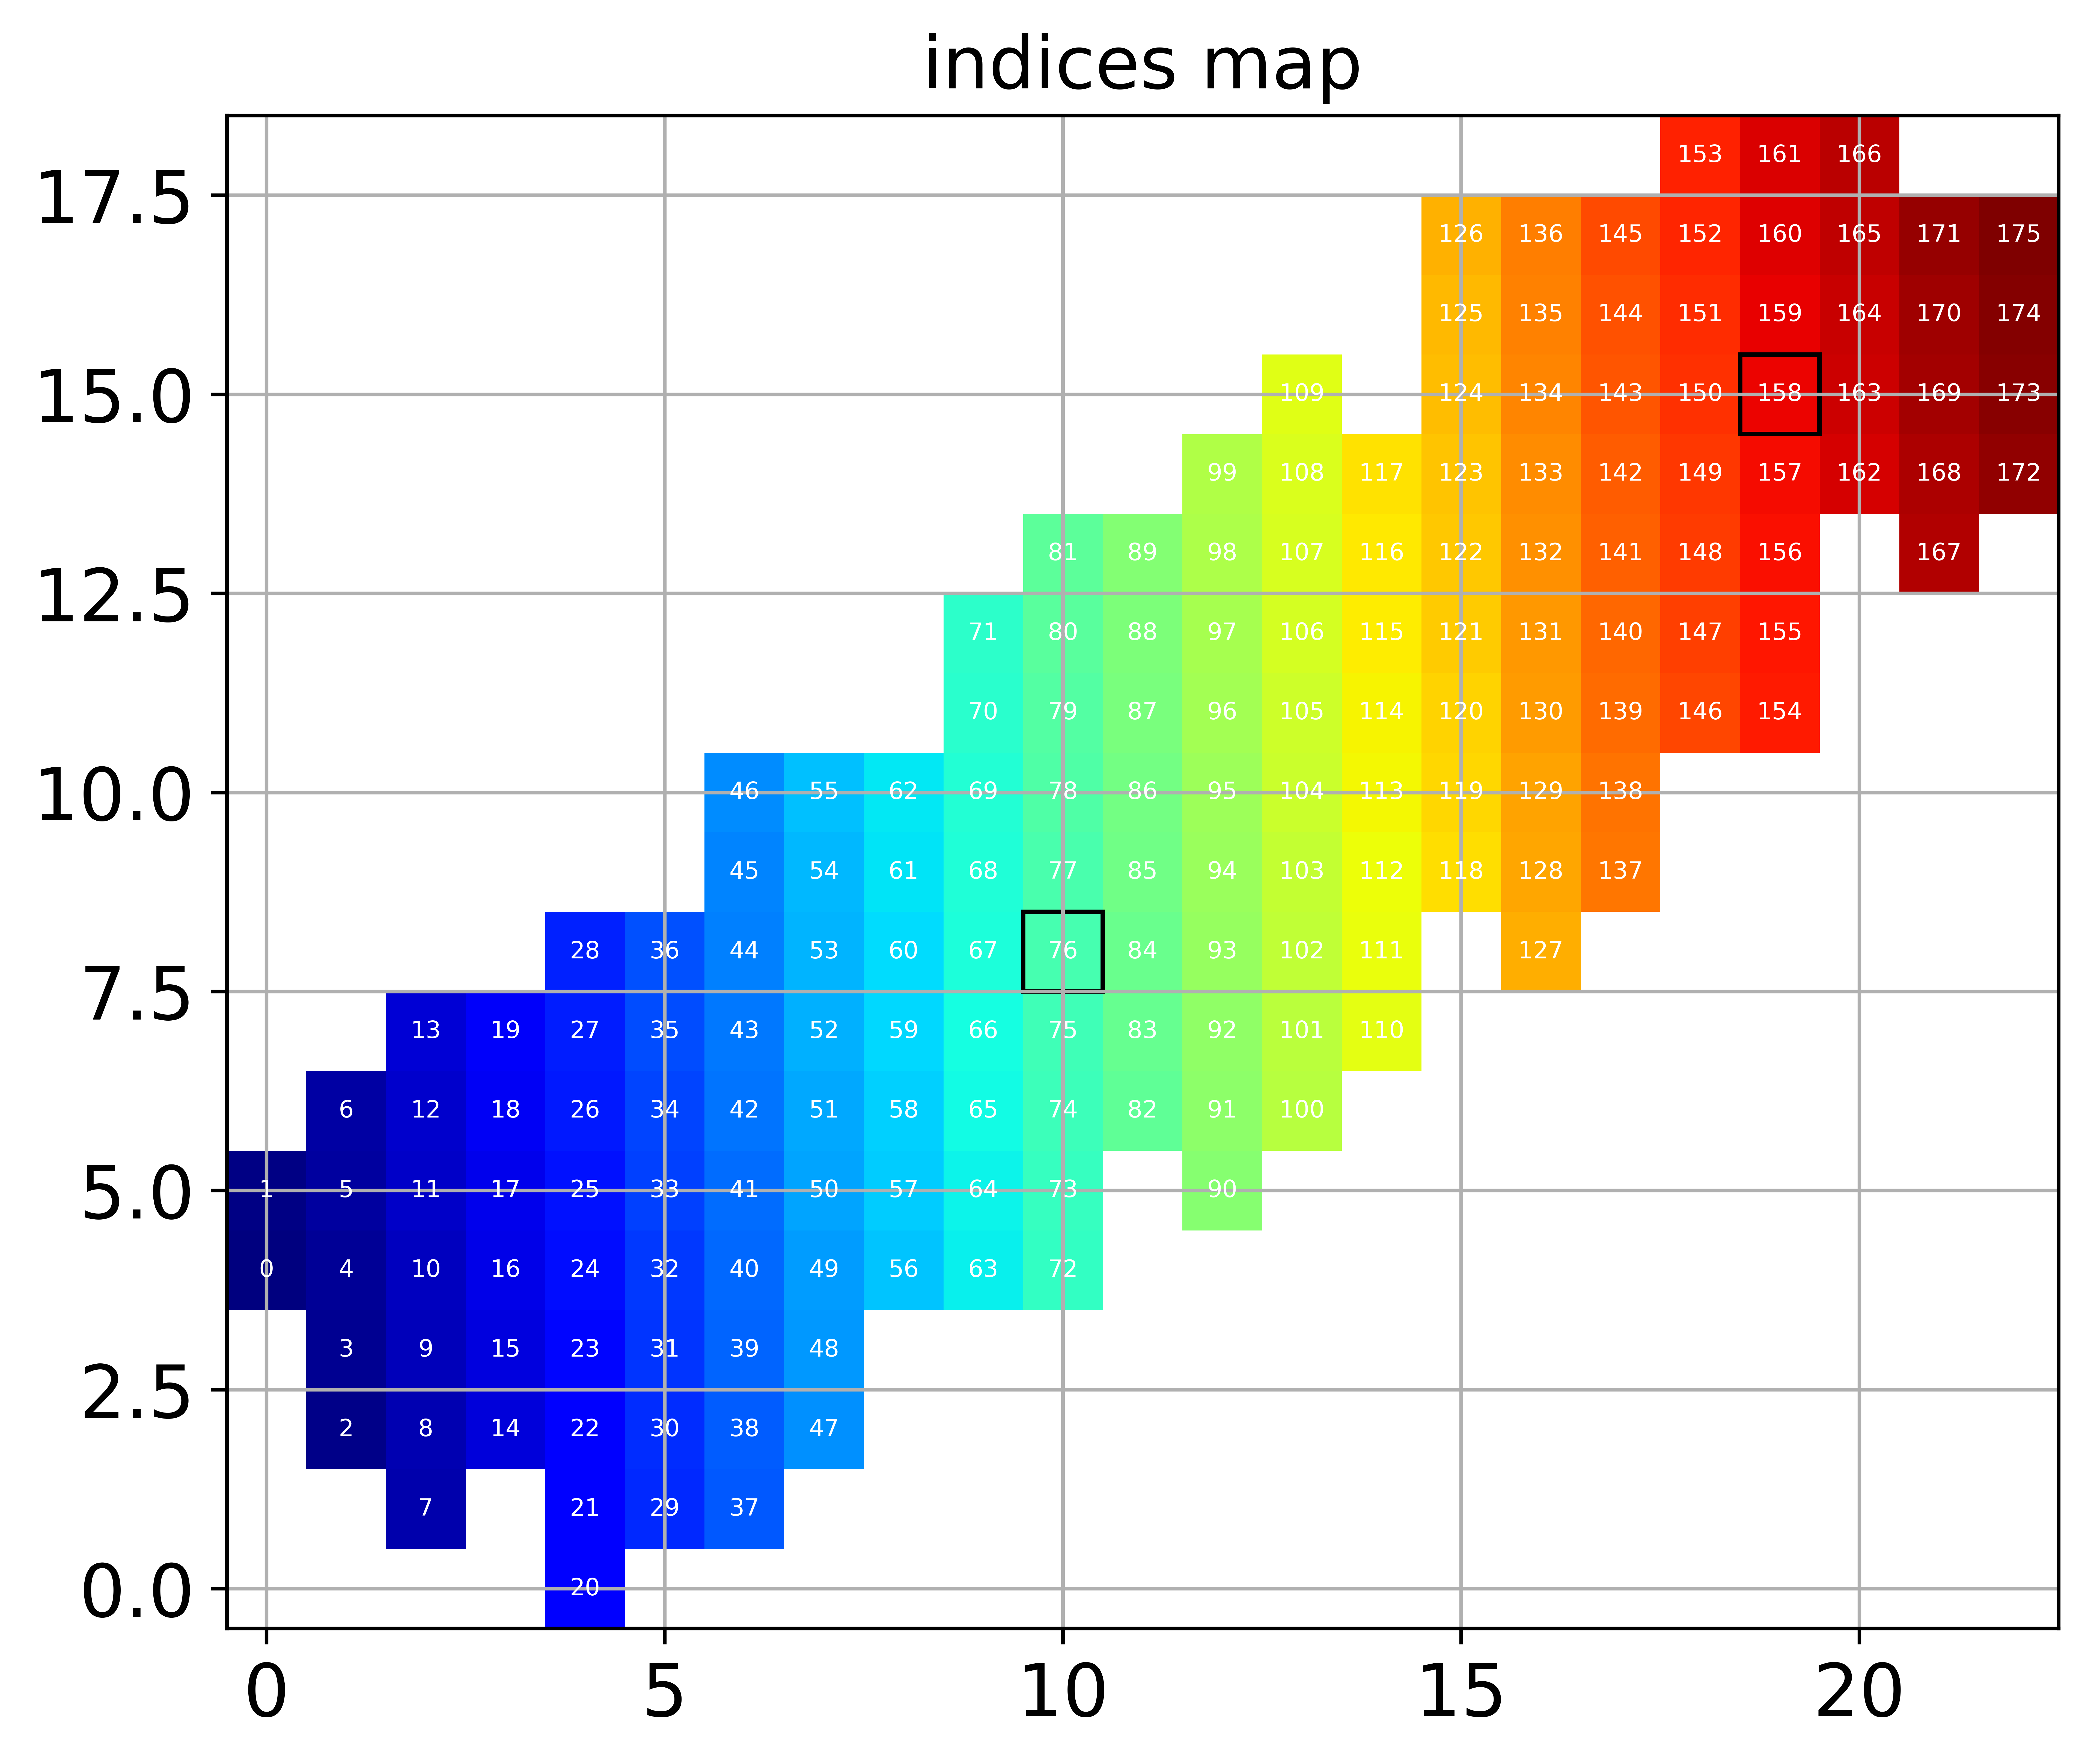

In [15]:
setup_plotter.plot_indices_map()

display.Image(f"{path_img}/indices_map.PNG")

You may also want to plot the additive noise standard deviation :

In [16]:
setup_plotter.plot_sigma_a(
    sigma_a=df_err.loc[:, list_lines].values,
    list_lines=list_lines,
    folder_path=path_img,
)

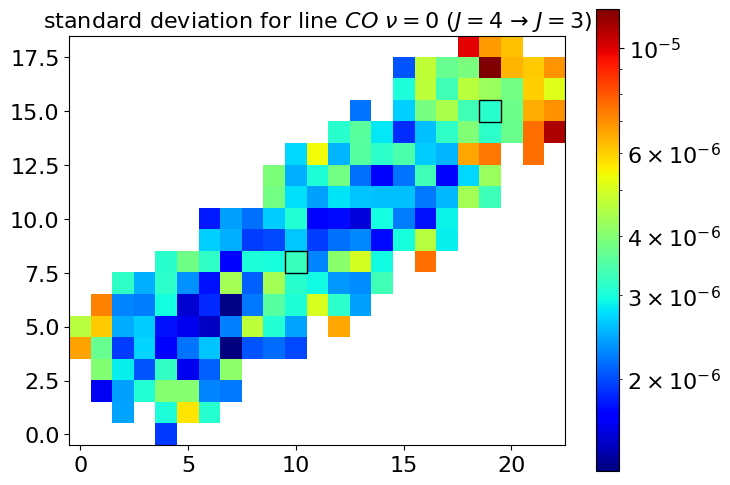

In [17]:
display.Image(f"{path_img}/add_err_std_line_0_co_v0_j4__v0_j3.PNG")

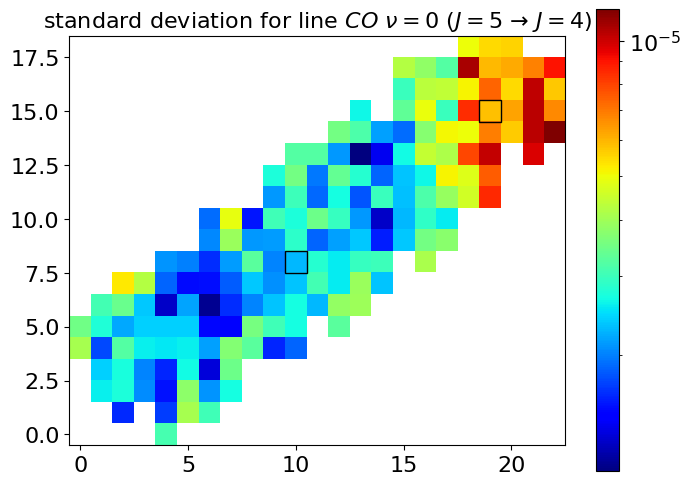

In [18]:
display.Image(f"{path_img}/add_err_std_line_1_co_v0_j5__v0_j4.PNG")

Finally, to assess the Signal to noise ratio (SNR):

In [19]:
setup_plotter.plot_snr_add(
    y=df_int.loc[:, list_lines].values,
    sigma_a=df_err.loc[:, list_lines].values,
    list_lines=list_lines,
    folder_path=path_img,
)

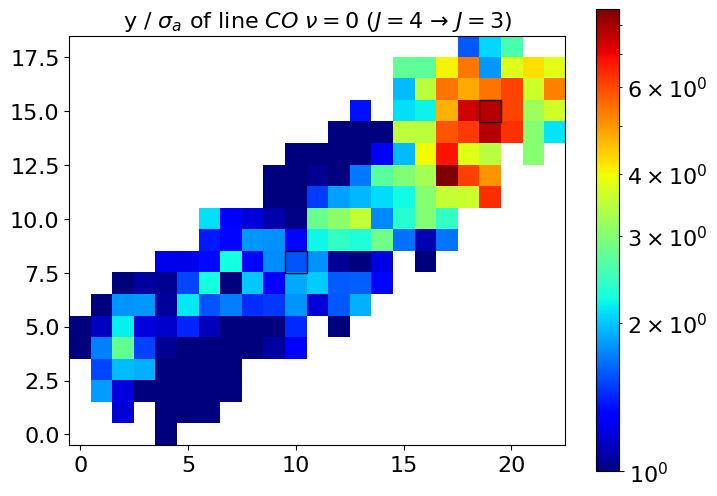

In [20]:
display.Image(f"{path_img}/snr_line_0_co_v0_j4__v0_j3.PNG")

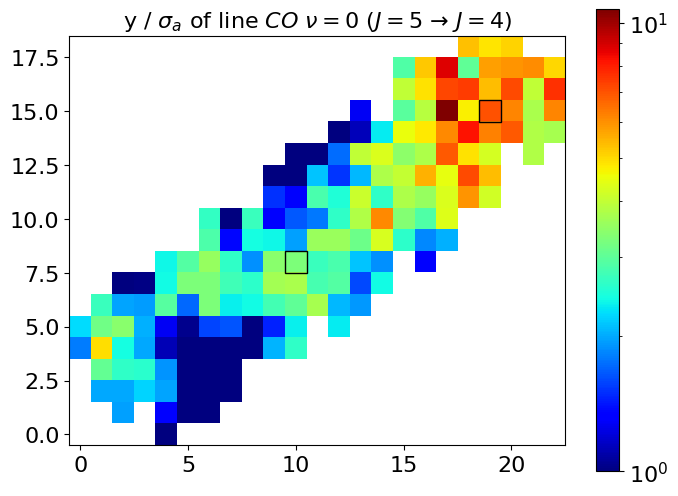

In [21]:
display.Image(f"{path_img}/snr_line_1_co_v0_j5__v0_j4.PNG")

In the case of the Carina Nebula, these figures show the variation of SNR, with a bright and high SNR region at the top of the map, and a dark and low SNR region in the bottom. 

## PlotEstimators : Already implemented methods to plot inference results

In [22]:
# load estimations from Wu et al. (2018)
df_wu2018 = pd.read_pickle("../data/carina/values_wu_et_al_2018.pkl")

df_wu2018.head()

kappa             P          radm  Avmax  alpha
X Y                                                  
2 9     1.0  6.851674e+07  10010.458030   10.0    0.0
  10    1.0  7.702090e+07  12538.628139   10.0    0.0
3 7     1.0  8.526743e+07  16992.703471   10.0    0.0
  8     1.0  8.526743e+07  13164.397808   10.0    0.0
  9     1.0  8.292417e+07  12968.686817   10.0    0.0

One can see that the index matches the index of the observations.

In [23]:
estimator_plotter = PlotsEstimator(
    map_shaper,
    list_names=[r"$\kappa$", r"$P_{th}$", r"$G_0$", r"A_V^{tot}$", r"$\alpha$"],
    lower_bounds_lin=np.array([0.1, 1e5, 1.0, 1.0, 0.0]),
    upper_bounds_lin=np.array([10.0, 1e9, 1e5, 40.0, 0.0]),
    list_idx_sampling=list(range(5)),
)

In [24]:
estimator_plotter.plot_estimator(
    Theta_estimated=df_wu2018.values, estimator_name="MLE", folder_path=path_img
)

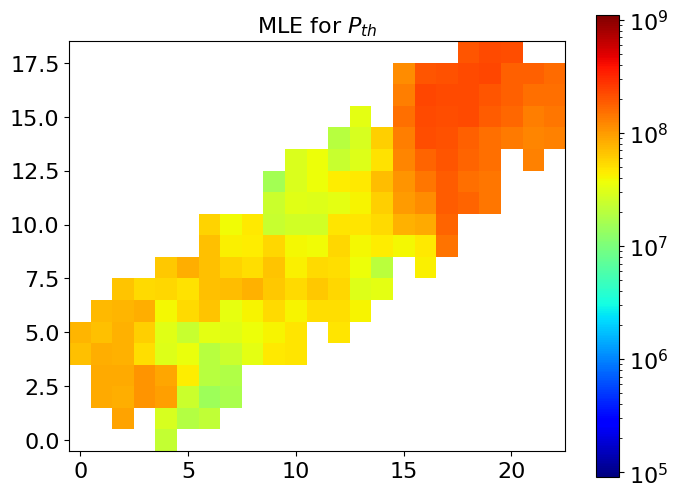

In [25]:
display.Image(f"{path_img}/MLE_1.PNG")

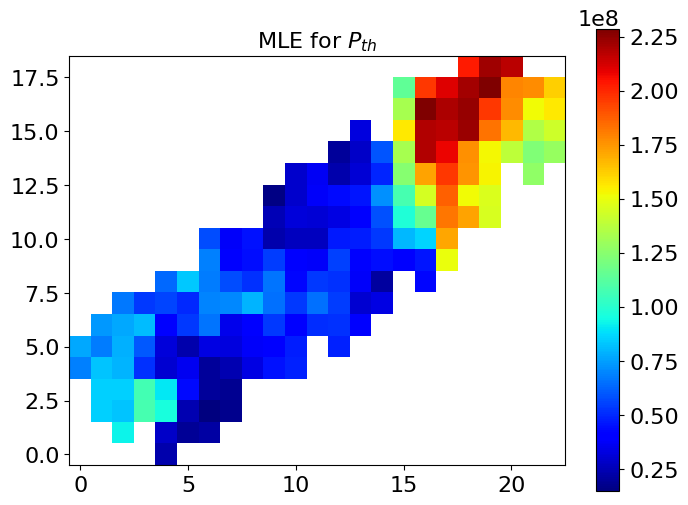

In [26]:
display.Image(f"{path_img}/MLE_linscale_1.PNG")

This class also contains other methods, for instance that can be used to illustrate credibility intervals.